# Project_02 : Johnson-Lindenstrauss Lemma

In [ ]:
print(__doc__)

import sys
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.random_projection import johnson_lindenstrauss_min_dim  # minimal number of dimensions(components)
from sklearn.random_projection import SparseRandomProjection         # Reduce dimensionality through "Sparse random projection."
from sklearn.random_projection import GaussianRandomProjection       # Reduce dimensionality through "Gaussian random projection."
from sklearn.metrics.pairwise import euclidean_distances             #

# Experiment 1 : n_samples vs n_components

In [ ]:
# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

# range of number of samples (observation) to embed
n_samples_range = np.logspace(1, 9, 9)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = None(n_samples, eps=eps_range) # minimal number of dimensions(components)
    plt.loglog(n_samples_range, min_n_components, color=color)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Number of observations to eps-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")

# range of admissible distortions
eps_range = np.linspace(0.01, 0.99, 100)

# range of number of samples (observation) to embed
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(n_samples_range)))

plt.figure()

# Experiment 2 : Gaussian Random Projection

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from time import time

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# randomly select 5000 images from the dataset
idx = np.random.choice(mnist.data.shape[0], 5000)
X = mnist.data[idx]
y = mnist.target[idx]

# compute pairwise distances in the original space
t0 = time()
D = pairwise_distances(X)
print("Pairwise distances computed in %0.2fs." % (time() - t0))

# compute PCA embedding
t0 = time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("PCA embedding computed in %0.2fs." % (time() - t0))

# compute pairwise distances in the embedded space
t0 = time()
D_pca = pairwise_distances(X_pca)
print("Pairwise distances computed in %0.2fs." % (time() - t0))

# plot the pairwise distance matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(D)
axes[0].set_title("Pairwise distances (original space)")
axes[1].imshow(D_pca)
axes[1].set_title("Pairwise distances (PCA space)")
plt.show()



C:\Users\mrtar\AppData\Roaming\Python\Python39\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyError: "None of [Int64Index([45803, 64660, 57470, 38775, 37468, 63663, 37530, 39502, 54869,\n            20601,\n            ...\n            46913, 39588, 40229, 41575, 19088, 50827, 24075, 51263, 21150,\n            47219],\n           dtype='int64', length=5000)] are in the [columns]"

# Experiment 3 : Sparse Random Projection
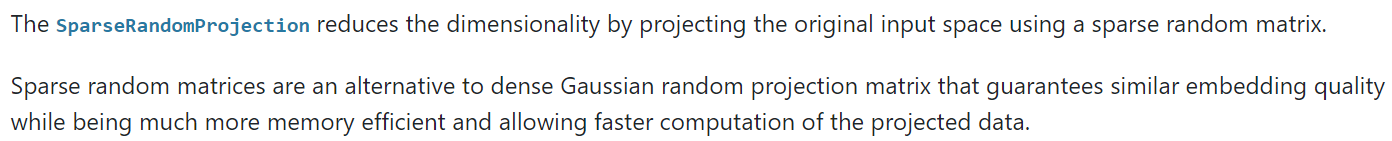

In [2]:
#load fetch_20newsgroups_vectorized Data
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized().data[:500]

n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.array([300, 1000, 10000])
dists = None(None, squared=True).ravel() # use Euclidean distance (The distance of each node in the original data)

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = None(n_components = None) # Reduce dimensionality through " Sparse Random Projection".
    projected_data = None # Fit to data, then transform it.
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    
    # use Euclidean distance (The distance of each node after dimensionality reduction)
    projected_dists = None(None, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists 
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, density=True, range=(0., 2.), edgecolor='k')
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

<>:10: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?
<>:18: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?
<>:24: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?
<>:10: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?
<>:18: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?
<>:24: SyntaxWarning: 'NoneType' object is not callable; perhaps you missed a comma?


Embedding 500 samples with dim 130107 using various random projections


NameError: name 'np' is not defined